In [11]:
import json
import pandas as pd
from pprint import pprint
import sklearn
import numpy as np
import matplotlib.pyplot as plt

Load Data:

In [2]:
data = {}
with open('../resources/papers_subjects.json') as f:
    data = json.load(f)

data.keys()

dict_keys(['papers'])

Create Taxonomy:

In [3]:
def get_paper_subjects(paper):
    subjects = [paper['primary-subject']['id_subject']]
    subjects.extend([s['id_subject'] for s in paper['other-subjects']])
    return subjects

subjects_id_set = set()
c_p = 0

for paper in data['papers']:
    # add primary-subject
    primary_subject = paper['primary-subject']
    subjects_id_set.add((primary_subject['id_subject'], primary_subject['name_subject']))
    # check if the primary-subject is in 'Computer Science'
    if primary_subject['id_subject'].startswith('cs.'):
        c_p += 1
    # add other-subjects
    for other_s in paper['other-subjects']:
        subjects_id_set.add((other_s['id_subject'], other_s['name_subject']))
            
print(c_p, len(subjects_id_set))

30948 133


In [4]:
subjects_id_set

{('astro-ph', 'Astrophysics'),
 ('astro-ph.CO', 'Cosmology and Nongalactic Astrophysics'),
 ('astro-ph.EP', 'Earth and Planetary Astrophysics'),
 ('astro-ph.GA', 'Astrophysics of Galaxies'),
 ('astro-ph.HE', 'High Energy Astrophysical Phenomena'),
 ('astro-ph.IM', 'Instrumentation and Methods for Astrophysics'),
 ('astro-ph.SR', 'Solar and Stellar Astrophysics'),
 ('cond-mat', 'Condensed Matter'),
 ('cond-mat.dis-nn', 'Disordered Systems and Neural Networks'),
 ('cond-mat.mes-hall', 'Mesoscale and Nanoscale Physics'),
 ('cond-mat.mtrl-sci', 'Materials Science'),
 ('cond-mat.quant-gas', 'Quantum Gases'),
 ('cond-mat.soft', 'Soft Condensed Matter'),
 ('cond-mat.stat-mech', 'Statistical Mechanics'),
 ('cond-mat.str-el', 'Strongly Correlated Electrons'),
 ('cond-mat.supr-con', 'Superconductivity'),
 ('cs.AI', 'Artificial Intelligence'),
 ('cs.AR', 'Hardware Architecture'),
 ('cs.CC', 'Computational Complexity'),
 ('cs.CE', 'Computational Engineering, Finance, and Science'),
 ('cs.CG', 'Com

Taxonomy: https://arxiv.org

- https://arxiv.org/archive/cs
- https://arxiv.org/archive/astro-ph
- https://arxiv.org/archive/cond-mat
- https://arxiv.org/archive/econ
- https://arxiv.org/archive/eess
- https://arxiv.org/archive/hep-ex
- https://arxiv.org/archive/hep-ph
- https://arxiv.org/archive/hep-th
- https://arxiv.org/archive/math-ph
- https://arxiv.org/archive/math
- https://arxiv.org/archive/nlin
- https://arxiv.org/archive/nucl-ex
- https://arxiv.org/archive/nucl-th
- https://arxiv.org/archive/physics
- https://arxiv.org/archive/q-bio
- https://arxiv.org/archive/q-fin
- https://arxiv.org/archive/quant-ph
- https://arxiv.org/archive/stat

Create DataSet:

In [5]:
%%time
from sklearn.preprocessing import OneHotEncoder
def get_encoder(subjects):
    enc = OneHotEncoder().fit(np.array(sorted([s[0] for s in subjects])).reshape(-1, 1))
    #print(enc.categories_)
    return enc

def get_paper_subjects(paper):
    subjects = [paper['primary-subject']['id_subject']]
    subjects.extend([s['id_subject'] for s in paper['other-subjects']])
    return subjects

def transform_paper_subjects(enc, paper_subjects):
    return sum(enc.transform(np.array(paper_subjects).reshape(-1, 1)).toarray()) #.todense()


data_df = []
columns_df = ['paper_id', 'primary-subject']
columns_df.extend(sorted([c[0] for c in subjects_id_set]))

enc = get_encoder(subjects_id_set)

for paper in data['papers']:
    #if paper['primary-subject']['id_subject'].startswith('cs.'):
    row_df = [paper['id'], paper['primary-subject']['id_subject']]
    paper_subjects = get_paper_subjects(paper)
    row_df.extend(transform_paper_subjects(enc, paper_subjects))
    data_df.append(row_df)

df = pd.DataFrame(data=data_df, columns=columns_df, dtype=np.uint8)
df

Wall time: 12.8 s


,paper_id,primary-subject,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,cond-mat,...,q-fin.PM,q-fin.RM,q-fin.ST,q-fin.TR,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT
0,41513,cs.CV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41587,stat.ML,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,61821,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,61822,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,61823,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,101219,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37364,101220,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37365,101221,cs.CV,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
37366,101222,cs.LG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
def get_primary_subject_by_paper_id(paper_id):
    paper_row = df.loc[df.paper_id == paper_id]
    return paper_row['primary-subject'].to_numpy()[0]

def get_all_subjects_by_paper_id(paper_id):
    paper_row = df.loc[df.paper_id == paper_id].squeeze()
    return paper_row.index[paper_row == 1].to_list()

#print(get_primary_subject_by_paper_id('61822'))
#print(get_all_subjects_by_paper_id('61822'))

In [7]:
%%time
# check:
count = 0
for paper in data['papers']:
    #if paper['primary-subject']['id_subject'].startswith('cs.'):
    if paper['primary-subject']['id_subject'] != get_primary_subject_by_paper_id(paper['id']):
        print("Error primary-subject for %s." % paper['id'])
    else:
        if sorted(get_paper_subjects(paper)) != get_all_subjects_by_paper_id(paper['id']):
            print("Error all-subject for %s." % paper['id'])
        else:
            count += 1
print(count)

37368
Wall time: 5min 26s


In [8]:
BYTES_TO_MB_DIV = 0.000001
def print_memory_usage_of_data_frame(df):
    mem = round(df.memory_usage().sum() * BYTES_TO_MB_DIV, 3) 
    print("Memory usage is " + str(mem) + " MB")

print_memory_usage_of_data_frame(df)

Memory usage is 5.568 MB


Visualize paper-subjects:

In [9]:
subjects_counts = []
for s in subjects_id_set:
    subjects_counts.append((s[0],df[s[0]].sum()))

df_stats = pd.DataFrame(subjects_counts, columns=['subject', 'number_of_papers'])
df_stats

,subject,number_of_papers
0,physics.ins-det,5
1,cs.GL,3
2,math.AP,16
3,cond-mat.dis-nn,70
4,eess.SP,240
...,...,...
128,math.GM,1
129,math.OA,2
130,physics.ed-ph,1
131,q-bio.QM,227


Text(0.5, 0, 'subject')

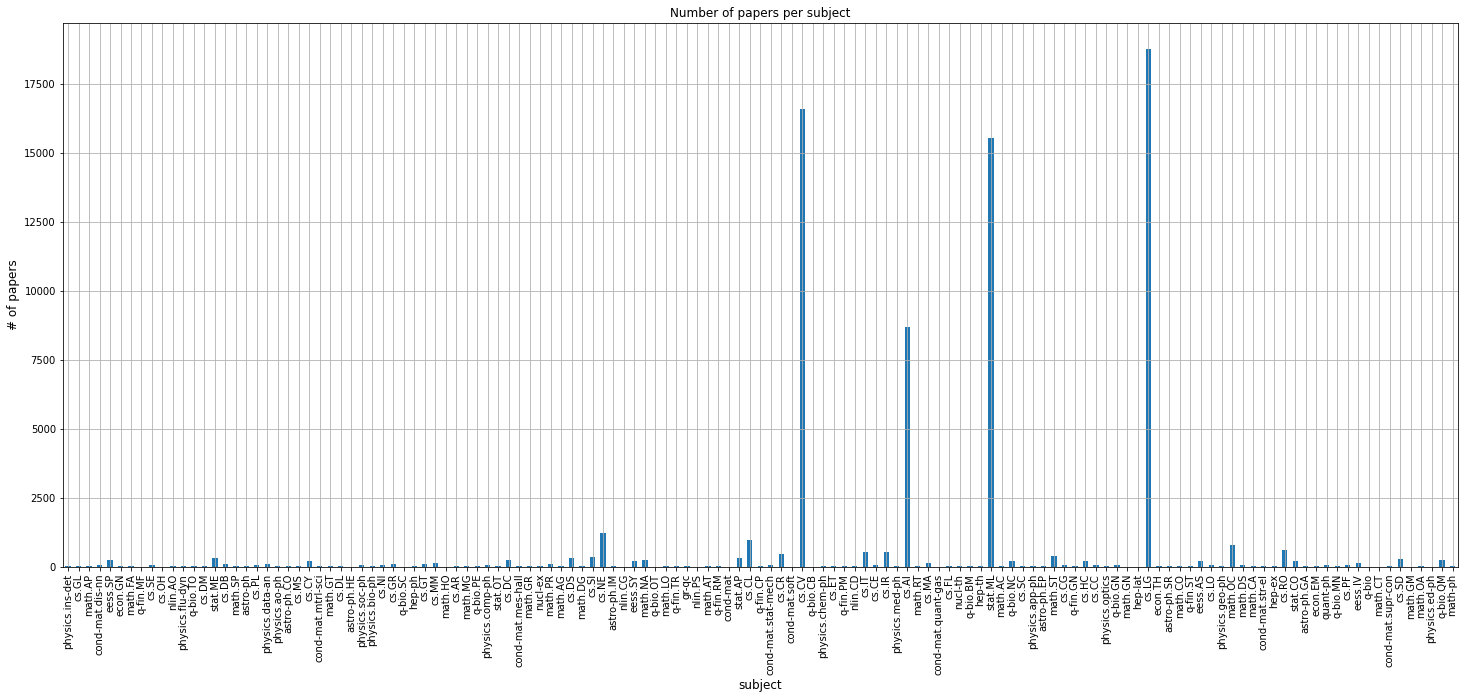

In [12]:
df_stats.plot(x='subject', y='number_of_papers', kind='bar', legend=False, grid=True, figsize=(25, 10))
plt.title("Number of papers per subject")
plt.ylabel('# of papers', fontsize=12)
plt.xlabel('subject', fontsize=12)

<AxesSubplot:>

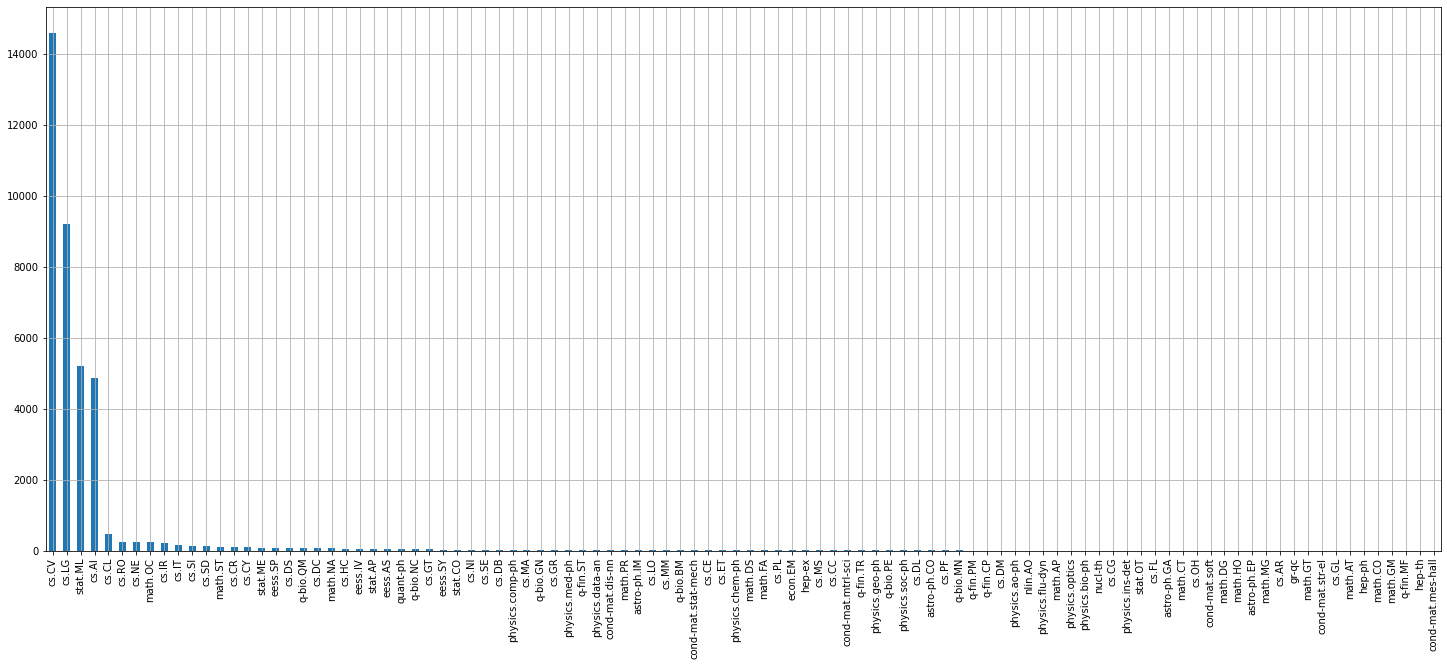

In [13]:
df['primary-subject'].value_counts().plot(kind='bar', grid=True, figsize=(25, 10))